## Exploratory Analysis

In this code file, we visualise the data using different methods (Charts, heatmaps, graphs, etc.). Additionally we shall execute some data modifications to combine different datasets, explore a certain characteristic to obtain meaningful results. 

##### Exporting the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from random import randint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
url1 = 'https://www.opendata.nhs.scot/dataset/0d57311a-db66-4eaa-bd6d-cc622b6cbdfa/resource/a5f7ca94-c810-41b5-a7c9-25c18d43e5a4/download/weekly_ae_activity_20240616.csv'
df_week_AE = pd.read_csv(url1)

url2 = 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/022c3b27-6a58-48dc-8038-8f1f93bb0e78/download/opendata_monthly_ae_when_202404.csv'
df_month_AE = pd.read_csv(url2)

url3 = 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/c4622324-f59c-4011-a67b-83b59c59ca94/download/opendata_monthly_ae_discharge_202404.csv'
df_discharge = pd.read_csv(url3)

In [3]:
# Convert WeekEndingDate to datetime format
df_week_AE['WeekEndingDate'] = pd.to_datetime(df_week_AE['WeekEndingDate'], format='%Y%m%d')
#The pd.to_datetime function converts the WeekEndingDate column from a string or integer format (YYYYMMDD) to a pandas datetime object.

# Extract Year and Month
df_week_AE['Year'] = df_week_AE['WeekEndingDate'].dt.year
df_week_AE['Month'] = df_week_AE['WeekEndingDate'].dt.month
df_week_AE['Day'] = df_week_AE['WeekEndingDate'].dt.day

# Display the updated DataFrame
df_week_AE.head()

,WeekEndingDate,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,PercentageWithin4HoursEpisode,NumberOver8HoursEpisode,PercentageOver8HoursEpisode,NumberOver12HoursEpisode,PercentageOver12HoursEpisode,Year,Month,Day
0,2015-02-22,S92000003,S08000015,A210H,Emergency Department,814,624,190,76.7,21,2.6,2,0.2,2015,2,22
1,2015-02-22,S92000003,S08000015,A111H,Emergency Department,1347,1115,232,82.8,31,2.3,2,0.1,2015,2,22
2,2015-02-22,S92000003,S08000016,B120H,Emergency Department,517,463,54,89.6,1,0.2,0,0.0,2015,2,22
3,2015-02-22,S92000003,S08000017,Y146H,Emergency Department,604,578,26,95.7,0,0.0,0,0.0,2015,2,22
4,2015-02-22,S92000003,S08000017,Y144H,Emergency Department,196,185,11,94.4,1,0.5,0,0.0,2015,2,22


In [15]:
# Sort the DataFrame by Date
df1 = df_week_AE.sort_values(by='WeekEndingDate')
df1.head()

,WeekEndingDate,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,PercentageWithin4HoursEpisode,NumberOver8HoursEpisode,PercentageOver8HoursEpisode,NumberOver12HoursEpisode,PercentageOver12HoursEpisode,Year,Month,Day
0,2015-02-22,S92000003,S08000015,A210H,Emergency Department,814,624,190,76.7,21,2.6,2,0.2,2015,2,22
31,2015-02-22,S92000003,S08000028,W107H,Emergency Department,113,110,3,97.3,0,0.0,0,0.0,2015,2,22
30,2015-02-22,S92000003,S08000030,T202H,Emergency Department,441,436,5,98.9,1,0.2,0,0.0,2015,2,22
29,2015-02-22,S92000003,S08000030,T101H,Emergency Department,895,883,12,98.7,0,0.0,0,0.0,2015,2,22
28,2015-02-22,S92000003,S08000026,Z102H,Emergency Department,146,142,4,97.3,0,0.0,0,0.0,2015,2,22


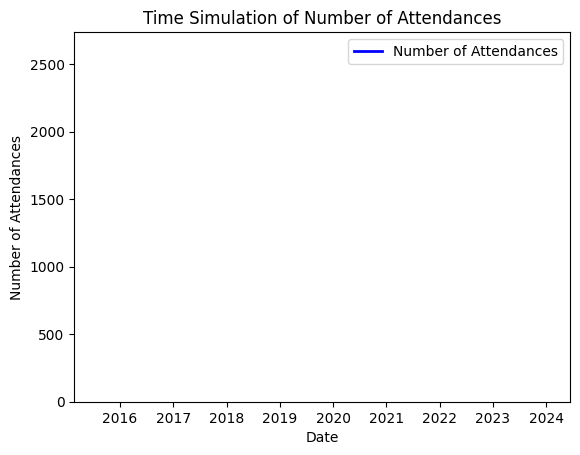

In [19]:
# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], 'b-', linewidth=2, label='Number of Attendances')
ax.set_xlim(df1['WeekEndingDate'].min(), df1['WeekEndingDate'].max())
ax.set_ylim(0, df1['NumberOfAttendancesEpisode'].max() + 50)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Attendances')
ax.set_title('Time Simulation of Number of Attendances')
ax.legend()

# Data for the animation
dates = df1['WeekEndingDate'].values
attendance = df1['NumberOfAttendancesEpisode'].values

# Function to update the graph
def update(frame):
    current_dates = dates[:frame]
    current_attendance = attendance[:frame]
    line.set_data(current_dates, current_attendance)
    return line,

# Create the animation
anim = FuncAnimation(fig, update, frames=np.arange(1, len(dates) + 1), interval=200, blit=True)

# Show the plot
plt.show()

In [4]:
df_month_AE.head()

,Month,Country,HBT,TreatmentLocation,DepartmentType,Day,Week,Hour,InOut,NumberOfAttendances
0,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,00:00 to 00:59,Out of Hours,20
1,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,01:00 to 01:59,Out of Hours,14
2,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,02:00 to 02:59,Out of Hours,6
3,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,03:00 to 03:59,Out of Hours,5
4,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,04:00 to 04:59,Out of Hours,5


In [5]:
df_discharge.head()

,Month,Country,HBT,TreatmentLocation,DepartmentType,Age,AgeQF,Discharge,DischargeQF,NumberOfAttendances
0,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Admission to same Hospital,NaN,85
1,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Discharged Home or to usual Place of Residence,NaN,386
2,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Transferred to Other Hospital/Service,NaN,5
3,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,NaN,:,18
4,201801,S92000003,S08000015,A111H,Emergency Department,25-39,NaN,Admission to same Hospital,NaN,206
